In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  # Read the CSV into a pandas DataFrame
  try:
    df = pd.read_csv(fn)
    print("\nDataFrame created successfully:")
    display(df.head())
  except Exception as e:
    print(f"Error reading file {fn}: {e}")

Saving Restaurant reviews.csv to Restaurant reviews.csv
User uploaded file "Restaurant reviews.csv" with length 3594924 bytes

DataFrame created successfully:


,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,2447.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,NaN
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,NaN
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,NaN
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,NaN


In [ ]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Create a list of the restaurant names to filter by
restaurants = ["AB's - Absolute Barbecues", "eat.fit", "Urban Asia - Kitchen & Bar"]

# Filter the original DataFrame to include only the selected restaurants
df_final = df[df['Restaurant'].isin(restaurants)].copy() # Use .copy() to avoid SettingWithCopyWarning

# Display the head of the new DataFrame
display(df_final.head())


,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
600,eat.fit,Pournima Gupte,I had ordered gobi methi paratha.. it was ok. ...,3.0,"1 Review , 1 Follower",5/25/2019 10:24,0,NaN
601,eat.fit,Manish Aggarwal,Food was good but it was all leaking from the ...,3.0,1 Review,5/24/2019 20:43,2,NaN
602,eat.fit,Srishti M,"Intially, yes,the food was really good they we...",3.0,9 Reviews,5/23/2019 20:45,0,NaN
603,eat.fit,Basheer Shaik,Hyderabad's most worst and ugliest biryani i h...,1.0,"1 Review , 1 Follower",5/23/2019 14:50,0,NaN
604,eat.fit,Kirthi Kirthi,Very good at quality guys..even packaging is e...,4.0,"10 Reviews , 1 Follower",5/22/2019 17:10,0,NaN


In [ ]:
#generate random review function
import random

def get_random_review_and_rating(restaurant_name, dataframe):
    restaurant_df = dataframe[dataframe['Restaurant'] == restaurant_name]

    if restaurant_df.empty:
      return None, None
    else:
      random_review = restaurant_df.sample(1).iloc[0]
      return random_review['Review'], random_review['Rating']

# Example usage
test_restaurant = random.choice(restaurants)
review, rating = get_random_review_and_rating(test_restaurant, df_final)
if review:
  print(f"Random review for {test_restaurant}:\n{review}")
  print(f"Rating: {rating}")
else:
  print(f"No reviews found for {test_restaurant}")

Random review for eat.fit:
We ordered 1 Luckhnowi chicken biryani for 130 rupees. The taste was okay. Strong smell and taste of rose water spoiled the overall experience of having biryani. But I haven't had Lucknow biryani before, so can't really judge how it exactly supposed to taste.
Rating: 3.0


In [ ]:
# plot your performance function
import matplotlib.pyplot as plt
import pandas as pd # Import pandas to calculate running average

def plot_ratings_over_time(all_ratings):
  """
  Plots the daily ratings and running average over time.

  Args:
    all_ratings: A list of daily ratings.
  """
  # Create a list of days for the x-axis
  days_list = list(range(1, len(all_ratings) + 1))

  # Calculate the running average of ratings
  running_average = pd.Series(all_ratings).expanding().mean()

  # Create the plot
  plt.figure(figsize=(12, 6))

  # Plot daily ratings as points
  plt.scatter(days_list, all_ratings, label='Daily Rating', alpha=0.6, s=10)

  # Plot running average as a line
  plt.plot(days_list, running_average, label='Running Average', color='red')

  plt.xlabel("Day")
  plt.ylabel("Rating")
  plt.title("Daily Ratings and Running Average Over Time")
  plt.legend() # Add a legend to distinguish the lines
  plt.grid(True)
  plt.show()



You received an average of: 3.88


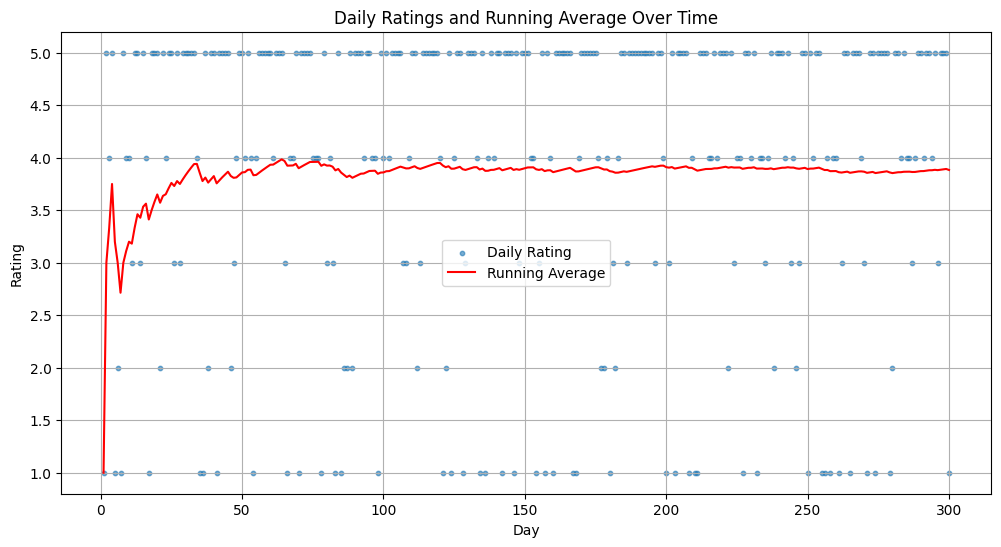

In [ ]:
# Go to a random restaurant strategy

days = 300

all_reviews = []
all_ratings = []

for i in range(days):
  #Decide which restaurant to go to.
  #This cannot depend on the ratings, only the reviews ---
  #you only have access to qualitative information!
  todays_restaurant = random.choice(restaurants)


  #see how well you did
  review, rating = get_random_review_and_rating(todays_restaurant, df_final)
  all_reviews.append(review)
  all_ratings.append(rating)


average_all_ratings_list = sum(all_ratings) / len(all_ratings)
print(f"You received an average of: {average_all_ratings_list:.2f}")
plot_ratings_over_time(all_ratings)

You received an average of: 4.38


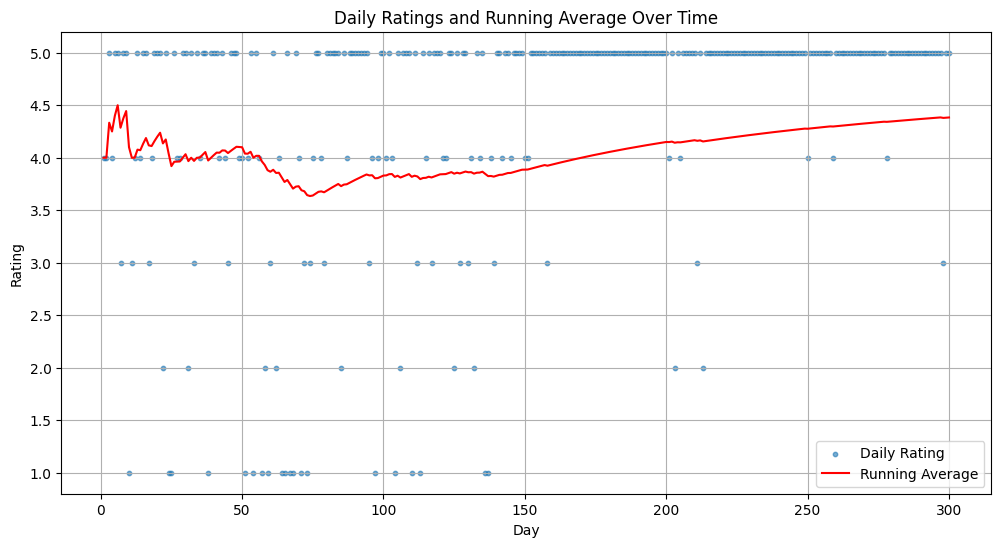

In [ ]:
# Improve (but i peeked)

days = 300

all_reviews = []
all_ratings = []

for i in range(days):
  #Decide which restaurant to go to.
  #This cannot depend on the ratings, only the reviews ---
  #you only have access to qualitative information!
  todays_restaurant = random.choice(restaurants)
  if i > 150:
    todays_restaurant = "AB's - Absolute Barbecues"

  #see how well you did
  review, rating = get_random_review_and_rating(todays_restaurant, df_final)
  all_reviews.append(review)
  all_ratings.append(rating)


average_all_ratings_list = sum(all_ratings) / len(all_ratings)
print(f"You received an average of: {average_all_ratings_list:.2f}")
plot_ratings_over_time(all_ratings)

day 0
day 1
Good review! Staying with Urban Asia - Kitchen & Bar
day 2
Good review! Staying with Urban Asia - Kitchen & Bar
day 3
Good review! Staying with Urban Asia - Kitchen & Bar
day 4
Bad review. Switching to AB's - Absolute Barbecues
day 5
Good review! Staying with AB's - Absolute Barbecues
day 6
Good review! Staying with AB's - Absolute Barbecues
day 7
Good review! Staying with AB's - Absolute Barbecues
day 8
Good review! Staying with AB's - Absolute Barbecues
day 9
Good review! Staying with AB's - Absolute Barbecues
day 10
Bad review. Switching to eat.fit
day 11
Bad review. Switching to Urban Asia - Kitchen & Bar
day 12
Bad review. Switching to AB's - Absolute Barbecues
day 13
Bad review. Switching to eat.fit
day 14
Good review! Staying with eat.fit
day 15
Bad review. Switching to Urban Asia - Kitchen & Bar
day 16
Good review! Staying with Urban Asia - Kitchen & Bar
day 17
Good review! Staying with Urban Asia - Kitchen & Bar
day 18
Good review! Staying with Urban Asia - Kitchen

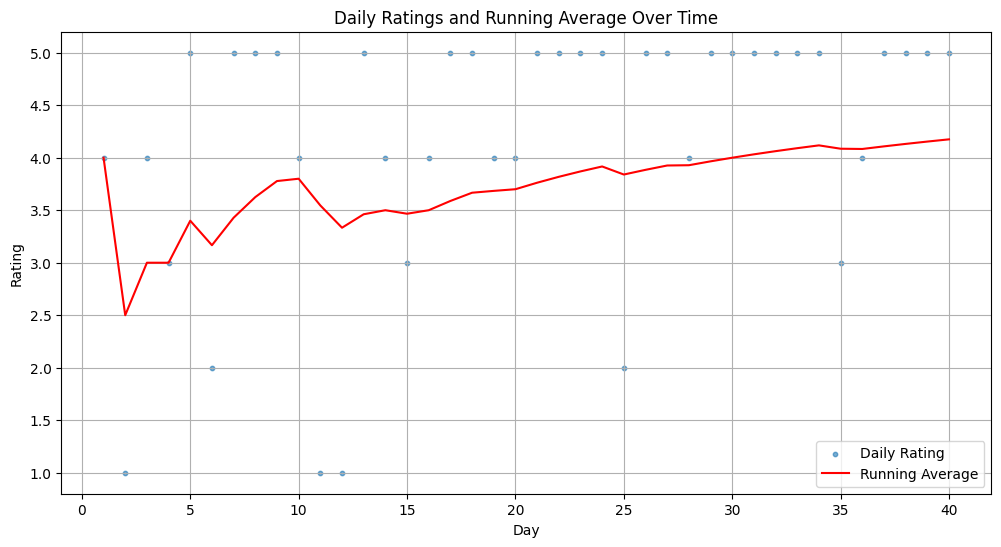

In [ ]:
#Fairweather friend strategy

from google import genai
import enum
from google.colab import userdata
import time

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
#genai.configure()

class Review_Parser(enum.Enum):
  GOOD = "Good"
  BAD = "Bad"

client = genai.Client(api_key=GOOGLE_API_KEY)


# print(response.text)

days = 40

all_reviews = []
all_ratings = []

for i in range(days):
  print(f"day {i}")
  #Decide which restaurant to go to.
  #This cannot depend on the ratings, only the reviews ---
  #you only have access to qualitative information!
  if i == 0:
    #first day just pick randomly
    todays_restaurant = random.choice(restaurants)
  if i>=1:
    turn_on_LLM = True
    if turn_on_LLM:
      response = client.models.generate_content(
      model='gemini-2.5-flash',
      contents='Is this review good or bad? ' + review,
      config={
          'response_mime_type': 'text/x.enum',
          'response_schema': Review_Parser,
      },
      )
      # time.sleep(1) #to get by rate limits for free google api calls
      response_parsed = response.text
    else:
      response_parsed = random.choice(["Good", "Bad"])


    if response_parsed == "Good":
      #no change
      # print(review)
      print(f"Good review! Staying with {todays_restaurant}")
    elif response_parsed == "Bad":
      todays_restaurant = random.choice([r for r in restaurants if r != todays_restaurant])
      # print(review)
      print(f"Bad review. Switching to {todays_restaurant}")

  #see how well you did
  review, rating = get_random_review_and_rating(todays_restaurant, df_final)
  all_reviews.append(review)
  all_ratings.append(rating)



average_all_ratings_list = sum(all_ratings) / len(all_ratings)
print(f"You received an average of: {average_all_ratings_list:.2f}")
plot_ratings_over_time(all_ratings)